In [1]:
def make_folder_name(localtime):
    
    if localtime.tm_hour > 12:
        string = str(localtime.tm_mon)+'_'+str(localtime.tm_mday)+'__'+ str(localtime.tm_hour-12)+'-'+str(localtime.tm_min)+'_pm'
    
    else:
        string = str(localtime.tm_mon)+'_'+str(localtime.tm_mday)+'_'+ str(localtime.tm_hour)+'-'+str(localtime.tm_min)+'_am'
    return string

In [2]:
import zipfile
import requests
import time

names of the datasets and their respective links

In [3]:
names = ['24hrModis1km','48hrModis1km','7dModis1km']
links = ['https://firms.modaps.eosdis.nasa.gov/active_fire/c6/shapes/zips/MODIS_C6_USA_contiguous_and_Hawaii_24h.zip',
        'https://firms.modaps.eosdis.nasa.gov/active_fire/c6/shapes/zips/MODIS_C6_USA_contiguous_and_Hawaii_48h.zip',
        'https://firms.modaps.eosdis.nasa.gov/active_fire/c6/shapes/zips/MODIS_C6_USA_contiguous_and_Hawaii_7d.zip']
folder_names = []
localtime = time.localtime(time.time())

Save the data into the right spot.
Go through each and  link

In [4]:
for i,name_Link in enumerate(zip(names,links)):
    
    # download the file contents in binary format
    r = requests.get(name_Link[1])
# open method to open a file on your system and write the contents
    with open(name_Link[0], "wb") as code:
        code.write(r.content)
    # Unzip the data
    zip_ref = zipfile.ZipFile(name_Link[0], 'r')
    name = make_folder_name(localtime)+'_'+name_Link[0]
    folder_names.append(name)
    zip_ref.extractall(name)
    zip_ref.close()

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shapefile
from geopy.geocoders import Nominatim
geolocator = Nominatim()
plt.figure(figsize=(14, 14))
m = Basemap(llcrnrlat = 30,
            llcrnrlon = -126,
            urcrnrlat = 45,
            urcrnrlon = -114,
           resolution='h')
print('fetching image')

C:\Users\Lenovo\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:138: UserWarning: Using Nominatim with the default "geopy/1.16.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


fetching image


<IPython.core.display.Javascript object>


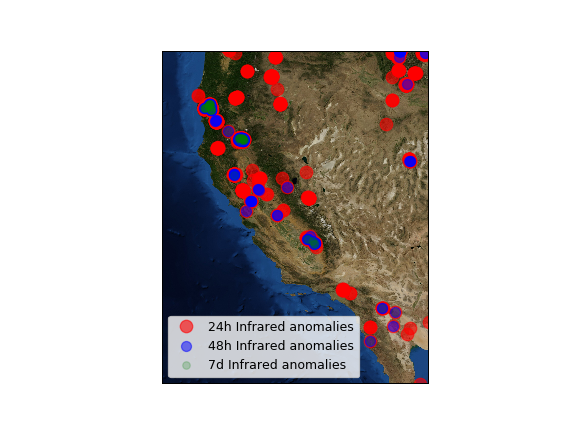

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image
adding indicators


In [6]:
%matplotlib notebook

#Downloads and plots an image using the arcgis REST API service
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2500, verbose= True,alpha= .6)


print('adding indicators')
names2 = ['MODIS_C6_USA_contiguous_and_Hawaii_24h','MODIS_C6_USA_contiguous_and_Hawaii_48h','MODIS_C6_USA_contiguous_and_Hawaii_7d']
i = 1
for name,name1 in (zip(reversed(folder_names),reversed(names2))):
    shpFilePath = name+'/'+name1
    listx=[]
    listy=[]
    test = shapefile.Reader(shpFilePath)
    for sr in test.shapeRecords():
        x,y = (sr.shape.points[0])
        listx.append(x)
        listy.append(y)
        x,y = m(listx,listy)
    if i == 1:
        Color = 'r'
        Label = '24h Infrared anomalies'
        a = .6
        m.plot(x, y, 'o',color = Color, markersize=10,alpha = a,label=Label)
    if i == 2:
        Color = 'b'
        Label = '48h Infrared anomalies'
        a = .5
        m.plot(x, y, 'o',color = Color, markersize=8,alpha = a,label=Label)
    if i == 3:
        Color = 'g'
        Label = '7d Infrared anomalies'
        a = .2
        m.plot(x, y, 'o',color = Color, markersize=6,alpha = a,label=Label)
        
    i = i + 1
    plt.legend()

<IPython.core.display.Javascript object>


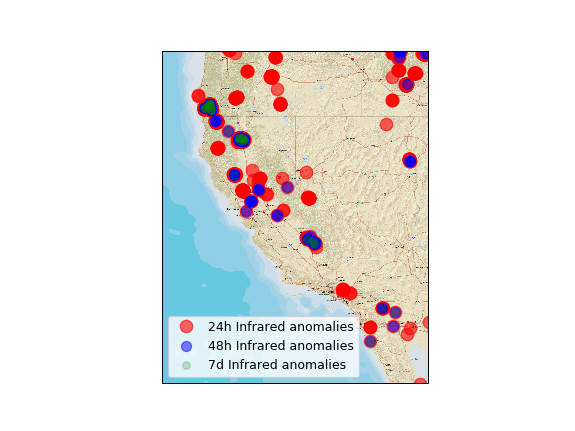

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image
adding indicators


In [7]:
%matplotlib notebook

#Downloads and plots an image using the arcgis REST API service
m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 2500, verbose= True,alpha= .6)


print('adding indicators')
names2 = ['MODIS_C6_USA_contiguous_and_Hawaii_24h','MODIS_C6_USA_contiguous_and_Hawaii_48h','MODIS_C6_USA_contiguous_and_Hawaii_7d']
i = 1
for name,name1 in (zip(reversed(folder_names),reversed(names2))):
    shpFilePath = name+'/'+name1
    listx=[]
    listy=[]
    test = shapefile.Reader(shpFilePath)
    for sr in test.shapeRecords():
        x,y = (sr.shape.points[0])
        listx.append(x)
        listy.append(y)
        x,y = m(listx,listy)
    if i == 1:
        Color = 'r'
        Label = '24h Infrared anomalies'
        a = .6
        m.plot(x, y, 'o',color = Color, markersize=10,alpha = a,label=Label)
    if i == 2:
        Color = 'b'
        Label = '48h Infrared anomalies'
        a = .5
        m.plot(x, y, 'o',color = Color, markersize=8,alpha = a,label=Label)
    if i == 3:
        Color = 'g'
        Label = '7d Infrared anomalies'
        a = .2
        m.plot(x, y, 'o',color = Color, markersize=6,alpha = a,label=Label)
        
    i = i + 1
    plt.legend()